In [3]:
# default_exp web.panel

# 简介
介绍一个可以迅速从jupyter notebook 迅速开发前段页面的框架 

可以快速做一些数据标注， 上面那个link是用panel开发的一个音像件处理的反馈界面

panel 可以和其他数据visualization 框架结合 做出非常动态的数据可视化前段 、https://www.youtube.com/watch?v=aZ1G_Q7ovmc

https://github.com/holoviz/panel


In [14]:
# !pip install panel
! pip freeze | grep panel

panel==0.9.5


# get started
https://panel.holoviz.org/getting_started/index.html

## Using Panel
Panel允许您为几乎任何您可以在Python中显示的东西添加交互式控件。

Panel可以帮助您构建简单的交互应用程序、复杂的多页面仪表板或介于两者之间的任何东西。

作为一个简单的例子，假设我们已经加载了在会议室中测量环境的UCI ML数据集

In [1]:
import pandas as pd; 
import numpy as np; 
import matplotlib.pyplot as plt

data = pd.read_csv('../data_origin/panel/assets/occupancy.csv')
data['date'] = data.date.astype('datetime64[ns]')
data = data.set_index('date')

data.tail()

Temperature  Humidity  Light         CO2  HumidityRatio  \
date                                                                           
2015-02-10 09:29:00        21.05   36.0975  433.0  787.250000       0.005579   
2015-02-10 09:29:59        21.05   35.9950  433.0  789.500000       0.005563   
2015-02-10 09:30:59        21.10   36.0950  433.0  798.500000       0.005596   
2015-02-10 09:32:00        21.10   36.2600  433.0  820.333333       0.005621   
2015-02-10 09:33:00        21.10   36.2000  447.0  821.000000       0.005612   

                     Occupancy  
date                            
2015-02-10 09:29:00          1  
2015-02-10 09:29:59          1  
2015-02-10 09:30:59          1  
2015-02-10 09:32:00          1  
2015-02-10 09:33:00          1

我们已经编写了一些代码来平滑时间序列，并使用Matplotlib突出显示异常值来绘制它

In [9]:
!pip freeze | grep matplotlib

matplotlib==3.1.1


In [2]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
#     FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): 
        highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

In [6]:
import pyecharts.options as opts
from utils.faker import  Faker
from pyecharts.charts import Line

In [15]:
def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    line = Line()
    line.add_xaxis(Faker.choose())
    line.add_yaxis(f"商家A{window}", Faker.values(), markpoint_opts=opts.MarkPointOpts(data=[{'coord': ['小米', '48']}]))
    line.add_yaxis("商家B", Faker.values())
    line.set_global_opts(title_opts=opts.TitleOpts(title="Line-基本示例"), 
                     toolbox_opts=opts.ToolboxOpts(is_show=True), # 显示工具箱配置项
                    )
    return line.render_notebook()

In [3]:
variable='Temperature'
window=30
sigma=10
avg = data[variable].rolling(window=window).mean()
residual = data[variable] - avg
std = residual.rolling(window=window).std()
outliers = (np.abs(residual) > std * sigma)
avg[outliers]

date
2015-02-05 18:40:59    21.582056
2015-02-07 09:46:00    20.432944
2015-02-07 09:47:00    20.459278
2015-02-07 09:48:00    20.484500
2015-02-07 09:49:00    20.508333
                         ...    
2015-02-09 18:46:00    21.569222
2015-02-09 18:47:00    21.552556
2015-02-09 18:48:00    21.535889
2015-02-09 18:52:00    21.469722
2015-02-09 21:49:00    20.500000
Name: Temperature, Length: 85, dtype: float64

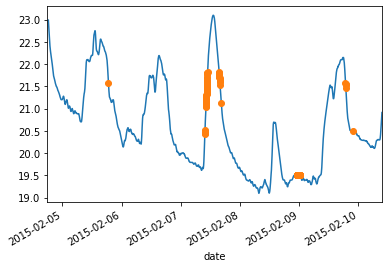

In [4]:
%matplotlib inline
fig = Figure()
ax = fig.add_subplot()
avg.plot()
avg[outliers].plot(style='o')

# plt.show(fig)

我们可以调用带有参数的函数并得到一个图

In [13]:
find_outliers(variable='Temperature', window=20, sigma=10)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


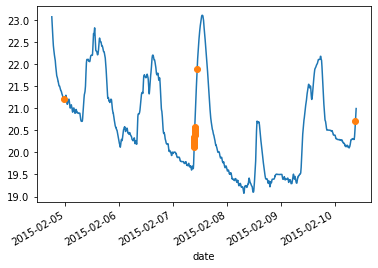

In [11]:
find_outliers(variable='Temperature', window=20, sigma=10)

有用！ 但是通过键入Python探索所有这些参数既缓慢又乏味。 另外，我们希望我们的老板或老板的老板能够尝试一下。

如果我们想尝试这些值的大量组合以了解窗口和西格玛如何影响绘图，我们可以重新评估上述单元格很多次，但这将是一个缓慢而痛苦的过程，并且仅对用户真正合适 谁喜欢编辑Python代码。 在接下来的几个示例中，我们将演示如何使用Panel快速向某些对象添加一些交互式控件并创建一个简单的应用程序。

## Interactive Panels
与编辑代码相比，使用滑块交互式地调整值更快捷、更直接。您可以很容易地使用pn. interaction开发一个面板应用程序来探索函数的参数，它类似于ipywidgets的交互功能

In [16]:
import panel as pn
pn.extension()

pn.interact(find_outliers)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


Column
    [0] Column
        [0] IntSlider(end=90, name='window', start=-30, value=30)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10)
    [1] Row
        [0] HTML(HTML, name='interactive00045')

只要您有运行中的实时Python进程，拖动这些窗口小部件都会触发对find_outliers回调函数的调用，对您选择的参数值的任何组合进行评估并显示结果。 

通过这样的面板，可以很容易地探索产生支持类型的视觉结果的任何功能，例如Matplotlib（如上所述），Bokeh，Plotly，Altair或各种文本和图像类型。

### Components of Panels

interact很方便，但是如果您想对其外观或工作方式进行更多控制，该怎么办？ 

首先，让我们看一下交互实际创建的内容，方法是获取该对象并显示其表示形式：

In [32]:
kw = dict(window=(1, 60), variable=sorted(list(data.columns)), sigma=(1, 20))
i = pn.interact(find_outliers, **kw)
i.pprint()

Column
    [0] Column
        [0] Select(name='variable', options=['CO2', 'Humidity', ...], value='Temperature')
        [1] IntSlider(end=60, name='window', start=1, value=30)
        [2] IntSlider(end=20, name='sigma', start=1, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00044')


如您所见，interact调用创建了一个pn.Column对象，该对象由一个WidgetBox（带有3个小部件）和一个pn.Row与一个Matplotlib图形对象组成。 面板是组合的，因此您可以随意混合和匹配这些组件，并根据需要添加其他对象：

请注意，即使小部件位于不同的笔记本单元中，它们仍保持与图的链接

Row
    [0] Matplotlib(Figure, name='interactive00044')
    [1] Column
        [0] Markdown(str)
        [1] Select(name='variable', options=['CO2', 'Humidity', ...], value='Temperature')
        [2] IntSlider(end=60, name='window', start=1, value=30)
        [3] IntSlider(end=20, name='sigma', start=1, value=10)
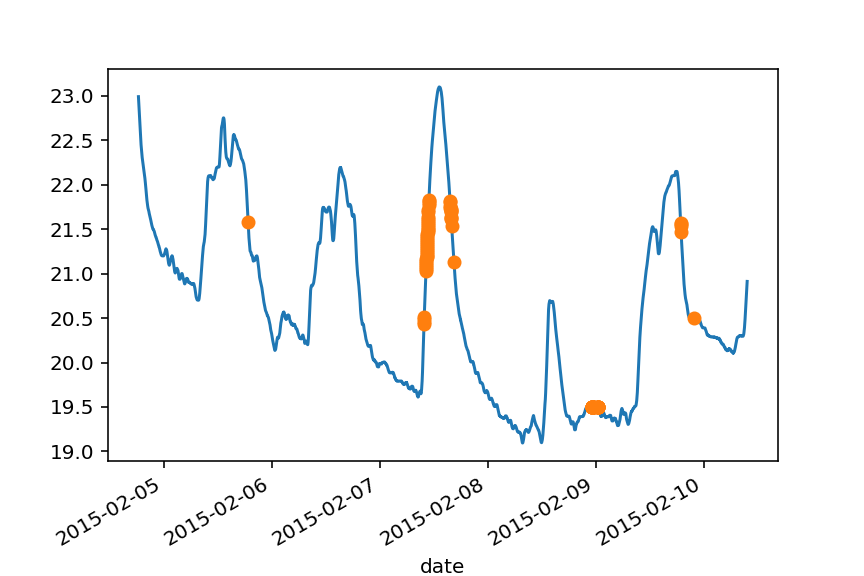

In [33]:
text = "<br>\n# Room Occupancy\nSelect the variable, and the time window for smoothing"

p = pn.Row(i[1][0], pn.Column(text, i[0][0], i[0][1], i[0][2]))
p

In [8]:
p.show()

Launching server at http://localhost:63928


In [9]:
i[0][2]

IntSlider(end=20, name='sigma', start=1, value=10)

还要注意，面板小部件是响应性的，因此即使手动设置值，它们也会更新

In [10]:
i[0][2].value = 5

### Composing new Panels
您可以使用这种组合方法以任意方式组合不同组件，例如
* 控件widgets，
* 绘图plots，
* 文本text
* 以及应用程序或仪表板所需的其他元素。   

interact示例建立在反应式编程模型的基础上，在该模型中，函数的输入发生更改，而Panel则以反应式方式更新了函数的输出。 

interact是从参数到函数自动创建窗口小部件的便捷方法，但是Panel还提供了更明确的反应式API，可让您专门定义窗口小部件和函数参数之间的连接，然后使您从头开始手动组成结果仪表板。

在以下示例中，我们显式声明了应用程序的每个组件：
* widgets，
* a function to return the plot，
* column and row containers
* 以及the completed occupancy Panel app。 

Widget对象具有多个“参数”（当前值，允许的范围等），

我们将使用Panel的depends装饰器声明函数的输入值应来自Widget的value参数。 

现在，当显示function和Widget时，只要任何输入发生更改，Panel都会自动更新显示的输出：

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] RadioButtonGroup(name='variable', options=['Temperature', ...], value='Temperature')
        [2] IntSlider(end=60, name='window', start=1, value=10)
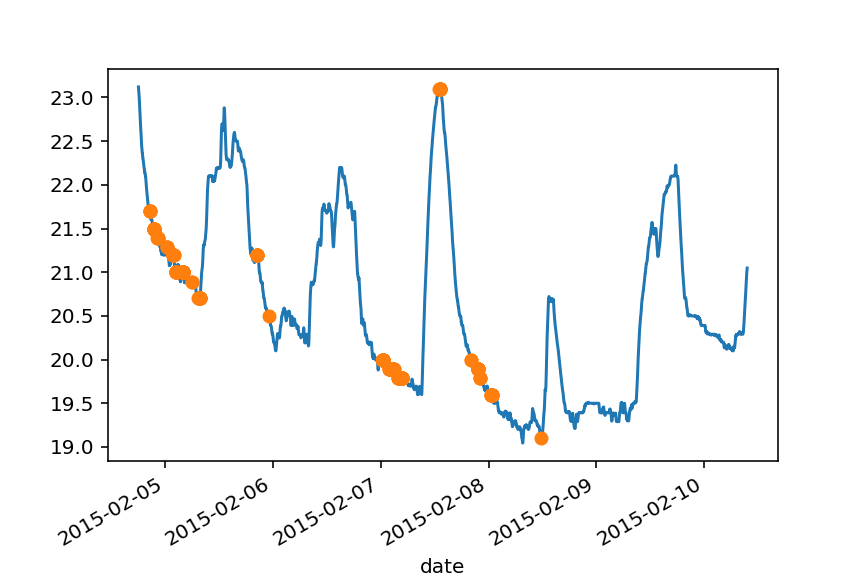

In [34]:
import panel.widgets as pnw

variable  = pnw.RadioButtonGroup(name='variable', value='Temperature', 
                                 options=list(data.columns))
window  = pnw.IntSlider(name='window', value=10, start=1, end=60)

@pn.depends(variable, window)
def reactive_outliers(variable, window):
    return find_outliers(variable, window, 10)

widgets   = pn.Column("<br>\n# Room occupancy", variable, window)
occupancy = pn.Row(reactive_outliers, widgets)
occupancy

### Deploying Panels
上面的面板都可以在notebook cell中工作(如果您有一个运行中的Jupyter内核)，但是与ipywidgets等其他方法不同，面板应用程序在独立的服务器中也可以工作。例如，上面的应用程序可以作为自己的web服务器在您的机器上启动，

In [35]:
type(occupancy)

panel.layout.Row

In [16]:
occupancy.show()

Launching server at http://localhost:64044


或者，您可以简单地使用.servable（）标记要在单独的网页中显示的内容，然后运行shell命令面板serve --show Introduction.ipynb启动包含该对象的服务器。 （在这里，我们还添加了分号，以避免在笔记本中再次获取占用应用程序的副本。）

In [17]:
occupancy.servable();

In [18]:
!panel serve --show panel.ipynb 

2020-04-25 22:25:11,602 Starting Bokeh server version 2.0.1 (running on Tornado 6.0.2)
2020-04-25 22:25:11,605 User authentication hooks NOT provided (default user enabled)
2020-04-25 22:25:11,607 Bokeh app running at: http://localhost:5006/panel
2020-04-25 22:25:11,607 Starting Bokeh server with process id: 2138
2020-04-25 22:25:11,842 Error running application handler <bokeh.application.handlers.notebook.NotebookHandler object at 0x115587ac8>: name 'get_ipython' is not defined
File "panel.ipynb", line 18, in <module>:
"cell_type": "code", Traceback (most recent call last):
  File "/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/bokeh/application/handlers/code_runner.py", line 197, in run
    exec(self._code, module.__dict__)
  File "/Users/luoyonggui/PycharmProjects/mayiexamples/0web/panel.ipynb", line 18, in <module>
    "cell_type": "code",
NameError: name 'get_ipython' is not defined
 
2020-04-25 22:25:12,226 WebSocket connection opened
2020-04-25 22:25:12,229 ServerConnec

## Declarative Panels
声明式面板

上面的组合方法非常灵活，但是将您特定于域的代码（有关正弦波的部分）与小部件显示代码联系在一起。 对于小型，快速的项目或以可视化代码为主的项目来说，这很好，但是对于大型，长期存在的项目，随着时间的推移，代码会在许多不同的上下文中使用，例如大批运行，一次性命令， 线路使用情况，笔记本和已部署的仪表板？ 对于类似的大型项目，重要的是能够将与基础领域（即应用程序或研究领域）有关的代码部分与与特定显示技术相关联的代码部分（例如Jupyter笔记本或Web服务器）分开。


In [36]:
import param

class RoomOccupancy(param.Parameterized):
    variable  = param.Selector(objects=list(data.columns))
    window    = param.Integer(default=10, bounds=(1, 20))
    sigma     = param.Number(default=10, bounds=(0, 20))

    def view(self):
        return find_outliers(self.variable, self.window, self.sigma)
    
obj = RoomOccupancy()
obj


RoomOccupancy(name='RoomOccupancy00075', sigma=10, variable='Temperature', window=10)

Row
    [0] Column(margin=5, name='Param00076', width=300)
        [0] StaticText(value='<b>RoomOccupancy</b>')
        [1] Select(name='Variable', options=OrderedDict([('Temperature...]), value='Temperature')
        [2] IntSlider(end=20, name='Window', start=1, value=10)
        [3] FloatSlider(end=20, name='Sigma', value=10)
    [1] ParamMethod(method)
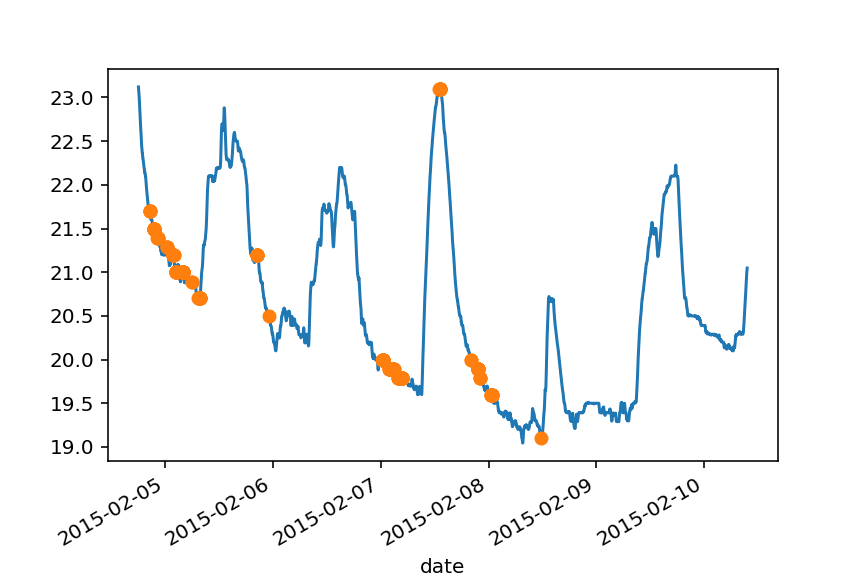

In [37]:
pn.Row(obj.param, obj.view)

In [38]:
import holoviews as hv

tap = hv.streams.PointerX(x=data.index.min())

def hvplot2(avg, highlight):
    line = avg.hvplot(height=300, width=500)
    outliers = highlight.hvplot.scatter(color='orange', padding=0.1)
    tap.source = line
    return (line * outliers).opts(legend_position='top_right')

@pn.depends(tap.param.x)
def table(x):
    index = np.abs((data.index - x).astype(int)).argmin()
    return data.iloc[index]

app = pn.interact(find_outliers, view_fn=hvplot2, **kw)

pn.Row(
    pn.Column("## Room Occupancy\nHover over the plot for more information.", app[0]),
    pn.Row(app[1], table)
)


AttributeError: 'Series' object has no attribute 'hvplot'

# User Guide
https://panel.holoviz.org/user_guide/index.html

## Overview

### Components
* Pane: 面板
* Widget: 控件
* Panel: A Panel is a hierarchical container to lay out multiple components (panes, widgets, or other Panels) into an arrangement that forms an app or dashboard.

### APIs

# 常用的Widgets

## 单选控件

### RadioButtonGroup

In [48]:
import panel.widgets as pnw

variable  = pnw.RadioButtonGroup(name='variable', value='Temperature', 
                                 options=list(data.columns))

### 单选下拉菜单Select

In [49]:
x = pn.widgets.Select(name='x', options=cols)
y = pn.widgets.Select(name='y', options=cols, value='sepal_width')

## 多选控件

In [ ]:
years = pn.widgets.MultiChoice(
    name='Years', options=list(autompg.yr.unique()), margin=(0, 20, 0, 0)
)

## 复选框Checkbox

In [50]:
observations = pn.widgets.Checkbox(name='Show individual observations')

## sliders

In [ ]:
n_clusters = pn.widgets.IntSlider(name='n_clusters', start=1, end=5, value=3)

bandwidth = pn.widgets.FloatSlider(name='KDE Bandwidth', start=0.1, end=1)

mpg = pn.widgets.RangeSlider(
    name='Mile per Gallon', start=autompg.mpg.min(), end=autompg.mpg.max()
)

## StaticText & Spinner

In [ ]:
static_text = pn.widgets.StaticText(name='Periodic Random Number Generator',
                                    value='000000')

periodic_cb = static_text.add_periodic_callback(
    generate_random_number, period=period.value, start=False)  # period in milliseconds

period = pn.widgets.Spinner(name="Period (ms)", value=500, step=50, start=50)
period.param.watch(update_period, 'value')

## Button & Toggle

In [ ]:


generate_button = pn.widgets.Button(name='Generate New Number')
generate_button.on_click(generate_random_number)

periodic_toggle = pn.widgets.Toggle(name='Periodically Generate',
                                    value=False, button_type='primary')
periodic_toggle.param.watch(toggle_periodic_callback, 'value')

## 文件下载

In [ ]:
fd = pn.widgets.FileDownload(
    callback=filtered_file, filename='filtered_autompg.csv'
)

# Gallery
https://panel.holoviz.org/gallery/index.html
## Demos
一组复杂的应用程序，用于演示Panel的功能。

## Simple Apps

Simple example apps meant to provide a quick introduction to Panel.

### 牵牛星等值线图
一个简单的例子演示了如何使用一个依赖于单个小部件的反应性函数来呈现Altair/Vega图。在本例中，Select小部件允许在可以绘制在choropleth地图上的各种数量之间进行选择。

In [58]:
# !pip install altair
!pip freeze | grep altair

altair==4.1.0


In [62]:
# !pip install vega_datasets
!pip freeze | grep vega

vega-datasets==0.8.0


In [63]:
import altair as alt
from vega_datasets import data
import panel as pn

pn.extension('vega')

Row
    [0] Column
        [0] Markdown(str)
        [1] PNG(str, height=150)
        [2] Select(name='Variable', options=['population', ...], value='population')
    [1] ParamFunction(function)
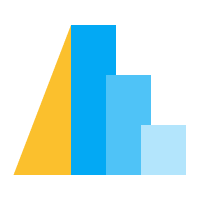

In [65]:
altair_logo = 'https://altair-viz.github.io/_static/altair-logo-light.png'
states = alt.topo_feature(data.us_10m.url, 'states')
states['url'] = 'https://raw.githubusercontent.com/vega/vega/master/docs/data/us-10m.json'
source = 'https://raw.githubusercontent.com/vega/vega/master/docs/data/population_engineers_hurricanes.csv'
variable_list = ['population', 'engineers', 'hurricanes']

variable = pn.widgets.Select(options=variable_list, name='Variable')

@pn.depends(variable.param.value)
def get_map(variable):
    return alt.Chart(states).mark_geoshape().encode(
        alt.Color(variable, type='quantitative')
    ).transform_lookup(
        lookup='id',
        from_=alt.LookupData(source, 'id', [variable])
    ).properties(
        width=500,
        height=300
    ).project(
        type='albersUsa'
    ).repeat(
        row=[variable]
    )

pn.Row(
    pn.Column('# Altair Choropleth Maps', pn.panel(altair_logo, height=150), variable),
    get_map
).servable()


### Iris kmeans
https://panel.holoviz.org/gallery/simple/iris_kmeans.html#simple-gallery-iris-kmeans



In [17]:
import panel as pn
import hvplot.pandas

from sklearn.cluster import KMeans
from bokeh.sampledata import iris
pn.extension()

/Users/luoyonggui/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/luoyonggui/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/luoyonggui/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/luoyonggui/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/luoyonggui/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufu

#### load data

In [19]:
iris.flowers.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [20]:
flowers = iris.flowers.copy()
cols = list(flowers.columns)[:-1]

#### 定义控件

In [21]:
x = pn.widgets.Select(name='x', options=cols)
y = pn.widgets.Select(name='y', options=cols, value='sepal_width')
n_clusters = pn.widgets.IntSlider(name='n_clusters', start=1, end=5, value=3)

#### 定义绘图函数

In [22]:
@pn.depends(x.param.value, y.param.value, n_clusters.param.value)
def get_clusters(x, y, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    est = kmeans.fit(iris.flowers.iloc[:, :-1].values)
    flowers['labels'] = est.labels_.astype('str')
    centers = flowers.groupby('labels').mean()
    return (flowers.sort_values('labels').hvplot.scatter(x, y, c='labels') *
            centers.hvplot.scatter(x, y, marker='x', color='black', size=200,
                                   padding=0.1, line_width=5))

#### layout

In [23]:
pn.Column(
    '# Iris K-Means Clustering',
    pn.Row(pn.WidgetBox(x, y, n_clusters), get_clusters)
).servable()

Column
    [0] Markdown(str)
    [1] Row
        [0] WidgetBox
            [0] Select(name='x', options=['sepal_length', ...], value='sepal_length')
            [1] Select(name='y', options=['sepal_length', ...], value='sepal_width')
            [2] IntSlider(end=5, name='n_clusters', start=1, value=3)
        [1] ParamFunction(function)

### Random number generator
本示例创建一个随机数生成器，该生成器每两秒钟或单击一个按钮定期更新一次。

这演示了如何添加定期回调，如何将按钮和切换链接到几个回调-前者手动生成随机数，而后者切换定期生成随机数。

In [24]:
import panel as pn
import numpy as np
pn.extension()

In [25]:
def generate_random_number(event=None):
    static_text.value = np.random.randint(low=100000, high=200000)

def toggle_periodic_callback(event):
    if event.new is True:
        periodic_cb.start()
    else:
        periodic_cb.stop()
        
def update_period(event):
    periodic_cb.period = event.new

In [26]:
static_text = pn.widgets.StaticText(name='Periodic Random Number Generator',
                                    value='000000')

generate_button = pn.widgets.Button(name='Generate New Number')
generate_button.on_click(generate_random_number)  # 按钮绑定事件

periodic_toggle = pn.widgets.Toggle(name='Periodically Generate',
                                    value=False, 
                                    button_type='primary'  # 控制btn的样式，类似bootstrap
                                   )
periodic_toggle.param.watch(toggle_periodic_callback, 'value')  # 只要periodic_toggle.value的值发生改变，触发绑定函数

period = pn.widgets.Spinner(name="Period (ms)", value=500, step=50, start=50)
period.param.watch(update_period, 'value')  # 只要period.value的值发生改变，触发绑定的函数

periodic_cb = static_text.add_periodic_callback(  # 添加周期性回调
    generate_random_number,   # 回调函数
    period=period.value,   # 回调周期
    start=False  
)  # period in milliseconds

In [27]:
col = pn.Column(generate_button, period, periodic_toggle, static_text)
col.servable()

Column
    [0] Button(name='Generate New Number')
    [1] Spinner(name='Period (ms)', start=50, step=50, value=500)
    [2] Toggle(button_type='primary', name='Periodically Generate')
    [3] StaticText(name='Periodic Random N..., value='000000')

### Save filtered df

In [29]:
import panel as pn

from bokeh.sampledata.autompg import autompg
from io import StringIO
pn.extension()

In [30]:
autompg.head()

mpg  cyl  displ   hp  weight  accel  yr  origin                       name
0  18.0    8  307.0  130    3504   12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165    3693   11.5  70       1          buick skylark 320
2  18.0    8  318.0  150    3436   11.0  70       1         plymouth satellite
3  16.0    8  304.0  150    3433   12.0  70       1              amc rebel sst
4  17.0    8  302.0  140    3449   10.5  70       1                ford torino

In [31]:
autompg.shape

(392, 9)

In [147]:
years = pn.widgets.MultiChoice(
    name='Years', options=list(autompg.yr.unique()), margin=(0, 20, 0, 0)
)
mpg = pn.widgets.RangeSlider(
    name='Mile per Gallon', start=autompg.mpg.min(), end=autompg.mpg.max()
)
fd = pn.widgets.FileDownload(
    callback=filtered_file, filename='filtered_autompg.csv'
)


In [148]:
@pn.depends(years, mpg)
def filtered_mpg(yr, mpg):
    df = autompg
    if yr:
        df = autompg[autompg.yr.isin(yr)]
    return df[(df.mpg >= mpg[0]) & (df.mpg <= mpg[1])]

@pn.depends(years, mpg)
def filtered_file(yr, mpg):
    df = filtered_mpg(yr, mpg)
    sio = StringIO()
    df.to_csv(sio)
    sio.seek(0)
    return sio




pdf = pn.panel(filtered_mpg, width=600)

pn.Column(pn.Row(years, mpg), fd, pdf, width=600)

Column(width=600)
    [0] Row
        [0] MultiChoice(margin=(0, 20, 0, 0), name='Years', options=[70, 71, 72, 73, ...])
        [1] RangeSlider(end=46.6, name='Mile per Gallon', start=9.0, value=(9.0, 46.6))
    [1] FileDownload(callback=<function filtered_file a..., filename='filtered_autompg.csv', label='Download filtered_autompg...)
    [2] ParamFunction(function, width=600)

### Temperature distribution
此示例演示如何将小部件放在一起以构建一个简单的UI来探索海面温度的分布，如下所示：

     声明各种小部件

     声明一个用pn.depends装饰的函数来表达对小部件值的依赖性

     定义一个回调，该回调弹出带宽滑块以控制内核密度估计（如果已启用）。

In [48]:
import hvplot.pandas
import panel as pn
import holoviews as hv

from bokeh.sampledata.sea_surface_temperature import sea_surface_temperature

pn.extension()

#### 定义控件

In [49]:
bins = pn.widgets.IntSlider(name='Number of bins', start=5, end=25, step=5, value=10)
kde = pn.widgets.Checkbox(name='Show density estimate')
observations = pn.widgets.Checkbox(name='Show individual observations')
bandwidth = pn.widgets.FloatSlider(name='KDE Bandwidth', start=0.1, end=1)

In [54]:
bandwidth.value

0.1

In [55]:
bandwidth.param.value

In [50]:
@pn.depends(bins.param.value, kde.param.value,
            observations.param.value, bandwidth.param.value)
def get_plot(bins, kde, obs, bw):
    plot = sea_surface_temperature.hvplot.hist(bins=bins, normed=True, xlabel='Temperature (C)', padding=0.1)
    if kde:
        plot *= sea_surface_temperature.hvplot.kde().opts(bandwidth=bw)
    if obs:
        plot *= hv.Spikes(sea_surface_temperature, 'temperature').opts(
            line_width=0.1, alpha=0.1, spike_length=-0.01)
    return plot

widgets = pn.WidgetBox('## Sea surface temperatures', bins, observations, kde)

def add_bandwidth(event):
    if event.new:
        widgets.append(bandwidth)
    else:
        widgets.remove(bandwidth)

kde.param.watch(add_bandwidth, 'value')

pn.Row(widgets, get_plot).servable()

/Users/luoyonggui/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/luoyonggui/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Row
    [0] WidgetBox
        [0] Markdown(str)
        [1] IntSlider(end=25, name='Number of bins', start=5, step=5, value=10)
        [2] Checkbox(name='Show individual o...)
        [3] Checkbox(name='Show density estimate')
    [1] ParamFunction(function)

## APIs

Examples meant to demonstrate the usage of different Panel APIs such as interact and reactive functions.

## Layouts

How to leverage Panel layout components to achieve complex layouts.

## Dynamic UIs

Examples demonstrating how to build dynamic UIs with components that are added or removed interactively.

## Param based apps

Using the Param library to express UIs independently of Panel.

## Linking

Using Javascript based links to define interactivity without without requiring a live kernel.

## External libraries

Wrapping external libraries with Panel.

# nb_update

In [7]:
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 00_template.ipynb.
Converted engineering_nbdev.ipynb.
Converted index.ipynb.
Converted web_panel.ipynb.


In [8]:
!nbdev_build_docs

converting: /Users/luoyonggui/PycharmProjects/nbdevlib/web_panel.ipynb
converting: /Users/luoyonggui/PycharmProjects/nbdevlib/00_template.ipynb
converting: /Users/luoyonggui/PycharmProjects/nbdevlib/engineering_nbdev.ipynb
converting: /Users/luoyonggui/PycharmProjects/nbdevlib/00_core.ipynb
converting /Users/luoyonggui/PycharmProjects/nbdevlib/index.ipynb to README.md
